In [1]:
import numpy as np 
import scipy.stats as stats
import pandas as pd
import scipy.io as io
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.ndimage import uniform_filter1d

In [2]:
fasted_folders = [
    '/Users/savani/Downloads/2p_data/glp23_fasted_30suc_L155P800_575um-20250205-113-selected',
    '/Users/savani/Downloads/2p_data/glp17_fasted30suc_L150P800_565um-032',
    '/Users/savani/Downloads/2p_data/glp10_fasted_30suc_L170P800_560um_040724-005',
    '/Users/savani/Downloads/2p_data/GLP6_FastedNoCues_L180_P815_600um-_-03092024-1421-084',
    '/Users/savani/Downloads/2p_data/glp4_fasted_nocues_L180_p815_650um031124-003'
]
wd_folders = [
    '/Users/savani/Downloads/2p_data/glp23_wd_30suc_L155P800_565um-107',
    '/Users/savani/Downloads/2p_data/glp17_wd_30trials_565um_L150P800-074',
    '/Users/savani/Downloads/2p_data/GLP10_240404_WD_suc_Dep625um_L170_T800_-007',
    '/Users/savani/Downloads/2p_data/GLP6_waterdNoCues_L170_P800_590um-03042024-1137-058',
    '/Users/savani/Downloads/2p_data/GLP4_waterdNoCues_L180_P815_650um-03042024-1137-056'
]

fed_folders = [
    '/Users/savani/Downloads/2p_data/glp23_fed_30suc_L155P800_575um-20250203-112',
    '/Users/savani/Downloads/2p_data/glp17_fed30suc_L150P800_565um_0613-020',
    '/Users/savani/Downloads/2p_data/glp10_fed_30suc_L170P800_560um_040924-025',
    '/Users/savani/Downloads/2p_data/GLP06_FedNoCues_L180P815_600um-03062024-1321-073',
    '/Users/savani/Downloads/2p_data/GLP4_FedNoCues_L180_P815_650um-_03052024-1355-066'
]

In [3]:
def load_data(folder_path):
    """
    Loads the data from the specified folder.

    Parameters:
        folder_path (str): Path to the folder containing the data files.
    Returns:
        tuple: A tuple containing the loaded data:
            - stat (np.ndarray): Stat file.
            - ops (np.ndarray): Ops file.
            - iscell (np.ndarray): Cell classification data.
            - F (np.ndarray): Fluorescence data.
"""
    stat = np.load(os.path.join(folder_path, 'stat.npy'), allow_pickle=True)
    ops = np.load(os.path.join(folder_path, 'ops.npy'), allow_pickle=True)
    iscell = np.load(os.path.join(folder_path, 'iscell.npy'), allow_pickle=True)
    F = np.load(os.path.join(folder_path, 'F.npy'), allow_pickle=True)
    return stat, ops, iscell, F

def filter_cells(F, iscell, filter_by='first'):
    """
    Filters the cells in F based on the iscell array.
    
    Parameters:
        F (np.ndarray): Fluorescence data array.
        iscell (np.ndarray): Array indicating cell classification.
        filter_by (str): 'first' to filter by iscell[:, 0] == 1,
                        'second' to filter by iscell[:, 1] == 1.
    Returns:
        np.ndarray: Filtered fluorescence data. 
    """
    if filter_by == 'first':
        mask = iscell[:, 0] == 1
    elif filter_by == 'second':
        mask = iscell[:, 1] == 1
    else:
        raise ValueError("filter_by must be 'first' or 'second'")
    return F[mask]

def rearrange_data(F, n_trials = 30, framespertrial = 375, fps = 15):
    """
    Rearranges the fluorescence data into a 3D array.
    
    Parameters:
        F (np.ndarray): Fluorescence data array.
        n_trials (int): Number of trials.
        framespertrial (int): Number of frames per trial.
        fps (int): Frames per second.
        
    Returns:
        np.ndarray: Rearranged fluorescence data.
    """
    n_cells = F.shape[0]

    # Reshape F to have dimensions (n_cells, n_trials, framespertrial)
    F_reshaped = F.reshape(n_cells, n_trials, framespertrial)
    
    return F_reshaped

def normalize_data(F, use_baseline = True, baseline_period = [0, 105], trial_by_trial = True):
    """
    Normalizes the fluorescence data.
    
    Parameters:
        F (np.ndarray): Fluorescence data array.
        use_baseline (bool): Whether to use baseline normalization.
        baseline_period (list): Time period for baseline normalization.
        
    Returns:
        np.ndarray: Normalized fluorescence data.
    """
    n_cells, n_trials, framespertrial = F.shape
    F_normalized = np.zeros_like(F)

    if trial_by_trial:
        for i in range(n_cells):
            for j in range(n_trials):
                if use_baseline:
                    baseline = np.mean(F[i, j, baseline_period[0]:baseline_period[1]])
                else:
                    baseline = np.mean(F[i, j, :])
            
                F_normalized[i, j, :] = (F[i, j, :]) / baseline
        
    return F_normalized 

def moving_average(data, window_size = 5):
    """
    Computes the moving average of the data.
    
    Parameters:
        data (np.ndarray): Data to compute the moving average on.
        window_size (int): Size of the moving window.
        
    Returns:
        np.ndarray: Moving average of the data.
    """
    return uniform_filter1d(data, size=window_size)


In [ ]:

for folder in fasted_folders:
    manual_folder = os.path.join(folder, 'suite2p_manual')
    new_folder = os.path.join(folder, 'suite2p', 'plane0')
    s, o, i, F = load_data(new_folder)
    print(F.shape)


(27, 11250)
(39, 11250)
(56, 11250)
(53, 11250)
(17, 11250)


In [ ]:
path = fasted_folders[0]
print(path)
new_folder = os.path.join(path, 'suite2p', 'plane0')
manual_folder = os.path.join(path, 'suite2p_manual')

s, o, i, F = load_data(new_folder)
F_first = filter_cells(F, i, filter_by='first')


s, o, i, F = load_data(manual_folder)
F_second = filter_cells(F, i, filter_by='second')

F_first_reshaped = rearrange_data(F_first)
F_second_reshaped = rearrange_data(F_second)

F_first_normalized = normalize_data(F_first_reshaped)
F_second_normalized = normalize_data(F_second_reshaped)

/Users/savani/Downloads/2p_data/glp23_fasted_30suc_L155P800_575um-20250205-113-selected


In [ ]:
cells_first = []
cells_second = []

for path in wd_folders:
    new_folder = os.path.join(path, 'suite2p', 'plane0')
    manual_folder = os.path.join(path, 'suite2p_manual')

    s, o, i, F = load_data(new_folder)
    F_first = filter_cells(F, i, filter_by='first')
    s, o, i, F = load_data(manual_folder)
    F_second = filter_cells(F, i, filter_by='second')

    cells_first += [F_first.shape[0]]
    cells_second += [F_second.shape[0]]
print(cells_first)
print(cells_second)
print(sum(cells_first))
print(sum(cells_second))

[24, 28, 28, 39, 14]
[25, 35, 21, 30, 15]
133
126


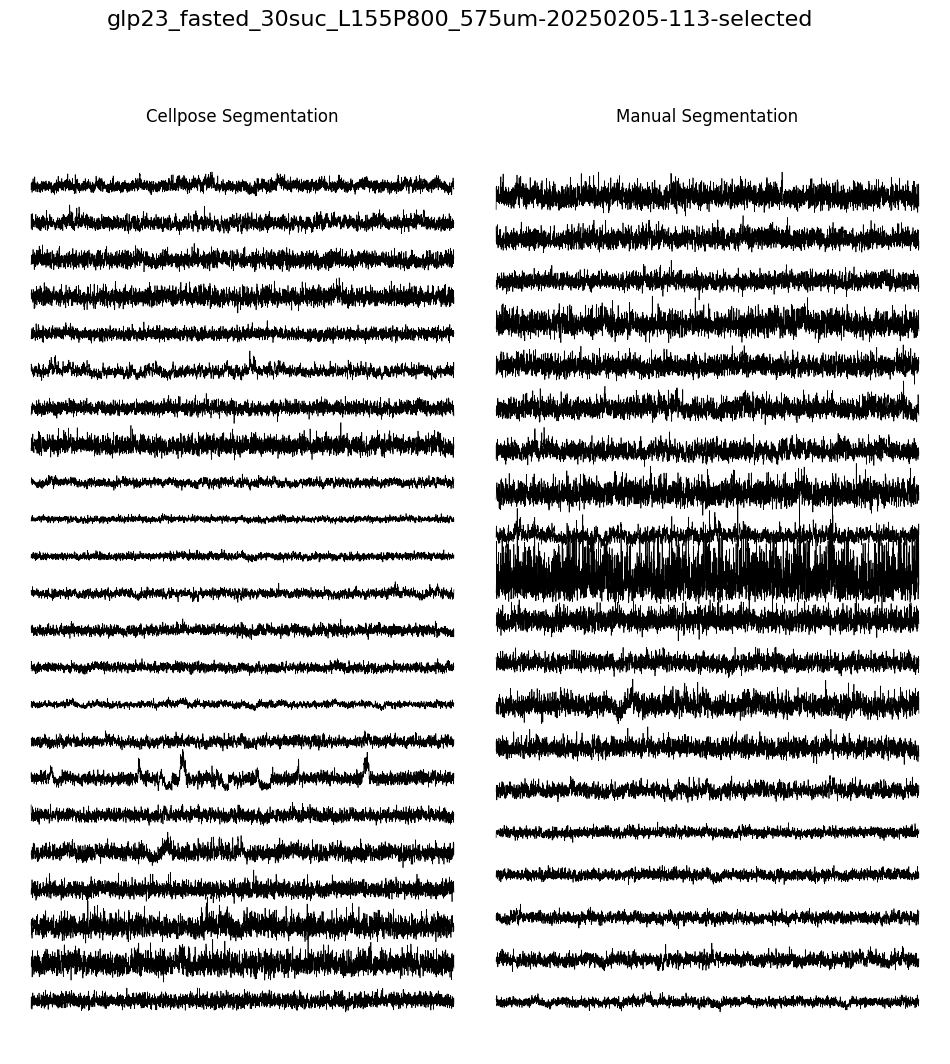

In [ ]:
# Plot subset of cells' whole trace across all trials
F_first_normalized = F_first_normalized.reshape(F_first_normalized.shape[0], -1)
F_second_normalized = F_second_normalized.reshape(F_second_normalized.shape[0], -1)
data = F_first_normalized

fig, (ax, ax1) = plt.subplots(1, 2, figsize=(12, 12))
for i in range(data.shape[0]):
    # Plot the moving average of the data
    data0 = moving_average(data[i, :], window_size=3)
    # Downsample the data
    data0 = data0[::3]
    # 
    ax.plot(data0 + i * 1.5, label=f'Cell {i+1}', lw = 0.5, c = 'black')

data = F_second_normalized
for i in range(data.shape[0]):
    # Plot the moving average of the data
    data0 = moving_average(data[i, :], window_size=3)
    # Downsample the data
    data0 = data0[::3]
    # 
    ax1.plot(data0 + i * 1.5, label=f'Cell {i+1}', lw = 0.5, c = 'black')

ax.set_title('Cellpose Segmentation')
ax1.set_title('Manual Segmentation')
sns.despine(left=True, bottom=True)
ax.set_yticks([])
ax1.set_yticks([])
ax.set_xticks([])
ax1.set_xticks([])
fig.suptitle(f'{path.split("/")[-1]}', fontsize=16)
plt.subplots_adjust(wspace=0)



In [28]:
def compare_segmentation(folder_path, save_path):
    """
    Compares the segmentation of cells using Cellpose and manual segmentation.
    
    Parameters:
        folder_path (str): Path to the folder containing the data files.
        save_path (str): Path to save the figure. If None, the figure will be shown.
    
    Returns:
        None
    """
    new_folder = os.path.join(folder_path, 'suite2p', 'plane0')
    manual_folder = os.path.join(folder_path, 'suite2p_manual')

    s, o, i, F = load_data(new_folder)
    F_first = filter_cells(F, i, filter_by='first')

    s, o, i, F = load_data(manual_folder)
    F_second = filter_cells(F, i, filter_by='second')

    F_first_reshaped = rearrange_data(F_first)
    F_second_reshaped = rearrange_data(F_second)

    F_first_normalized = normalize_data(F_first_reshaped)
    F_second_normalized = normalize_data(F_second_reshaped)

    # Plot subset of cells' whole trace across all trials
    F_first_normalized = F_first_normalized.reshape(F_first_normalized.shape[0], -1)
    F_second_normalized = F_second_normalized.reshape(F_second_normalized.shape[0], -1)
    data = F_first_normalized

    fig, (ax, ax1) = plt.subplots(1, 2, figsize=(12, 12))
    for i in range(data.shape[0]):
        # Plot the moving average of the data
        data0 = moving_average(data[i, :], window_size=3)
        # Downsample the data
        data0 = data0[::3]
        # 
        ax.plot(data0 + i * 1.5, label=f'Cell {i+1}', lw = 0.5, c = 'black')

    data = F_second_normalized
    for i in range(data.shape[0]):
        # Plot the moving average of the data
        data0 = moving_average(data[i, :], window_size=3)
        # Downsample the data
        data0 = data0[::3]
        # 
        ax1.plot(data0 + i * 1.5, label=f'Cell {i+1}', lw = 0.5, c = 'black')

    ax.set_title('Cellpose Segmentation')
    ax1.set_title('Manual Segmentation')
    sns.despine(left=True, bottom=True)
    ax.set_yticks([])
    ax1.set_yticks([])
    ax.set_xticks([])
    ax1.set_xticks([])
    fig.suptitle(f'{folder_path.split("/")[-1]}', fontsize=16)
    plt.subplots_adjust(wspace=0)

    if save_path:
        os.makedirs(save_path, exist_ok=True)
        plt.savefig(os.path.join(save_path, f'{folder_path.split("/")[-1]}_segmentation_comparison.png'))
        plt.close(fig)
    else:
        plt.show()



In [37]:
save_path = '/Users/savani/Downloads'
for folder in wd_folders:
    print(folder)
    compare_segmentation(folder, save_path)


/Users/savani/Downloads/2p_data/glp23_wd_30suc_L155P800_565um-107
/Users/savani/Downloads/2p_data/glp17_wd_30trials_565um_L150P800-074
/Users/savani/Downloads/2p_data/GLP10_240404_WD_suc_Dep625um_L170_T800_-007
/Users/savani/Downloads/2p_data/GLP6_waterdNoCues_L170_P800_590um-03042024-1137-058
/Users/savani/Downloads/2p_data/GLP4_waterdNoCues_L180_P815_650um-03042024-1137-056


In [46]:
from matplotlib.patches import Polygon

def save_mean_with_rois(folder_path,
                        roi_indices=None,
                        output_path=None,
                        cmap='gray',
                        outline_color='red',
                        outline_width=1,
                        fill_alpha=1):
    """
    Load Suite2p mean image and stat file, overlay selected ROI outlines, and save/show.

    Parameters
    ----------
    folder_path : str
        Root folder containing 'suite2p/plane{plane}/ops.npy' and 'stat.npy'.
    plane : int
        Which plane subfolder to look in (default 0).
    roi_indices : list of int or None
        List of ROI indices to overlay. If None, overlays all ROIs.
    output_path : str or None
        Where to save the PNG. If None, will plt.show() instead.
    cmap : str
        Matplotlib colormap for the background.
    outline_color : str
        Color for the ROI outlines.
    outline_width : float
        Line width for the ROI outlines.
    """
    # build paths
    pth = os.path.join(folder_path, 'suite2p', f'plane0')
    print(pth)
    ops_path  = os.path.join(pth, 'ops.npy')
    stat_path = os.path.join(pth, 'stat.npy')
    iscell_path = os.path.join(pth, 'iscell.npy')

    # load
    ops  = np.load(ops_path,  allow_pickle=True).item()
    stat = list(np.load(stat_path, allow_pickle=True))
    iscell = np.load(iscell_path)    

    mean_img = ops['meanImg']

    # default: only those marked as cells (iscell[:,0] == 1)
    if roi_indices is None:
        roi_indices = np.where(iscell[:, 0] == 1)[0]

    # set up figure
    fig, ax = plt.subplots(figsize=(8,8))
    ax.imshow(mean_img, cmap=cmap)
    ax.axis('off')

    # overlay each ROI as a polygon
    for idx in roi_indices:
        roi = stat[idx]
        # Suite2p stores pixels as (xpix, ypix) arrays
        coords = np.column_stack((roi['xpix'], roi['ypix']))
        poly = Polygon(coords,
                       closed=True,
                       edgecolor=outline_color,
                       facecolor='none',
                       linewidth=outline_width,
                       alpha=fill_alpha)
        ax.add_patch(poly)

    # save or show
    if output_path:
        os.makedirs(os.path.dirname(output_path), exist_ok=True)
        plt.savefig(output_path, 
                    dpi=150,
                    bbox_inches='tight',
                    pad_inches=0)
        plt.close(fig)
    else:
        plt.show()


/Users/savani/Downloads/2p_data/glp23_fasted_30suc_L155P800_575um-20250205-113-selected/suite2p/plane0


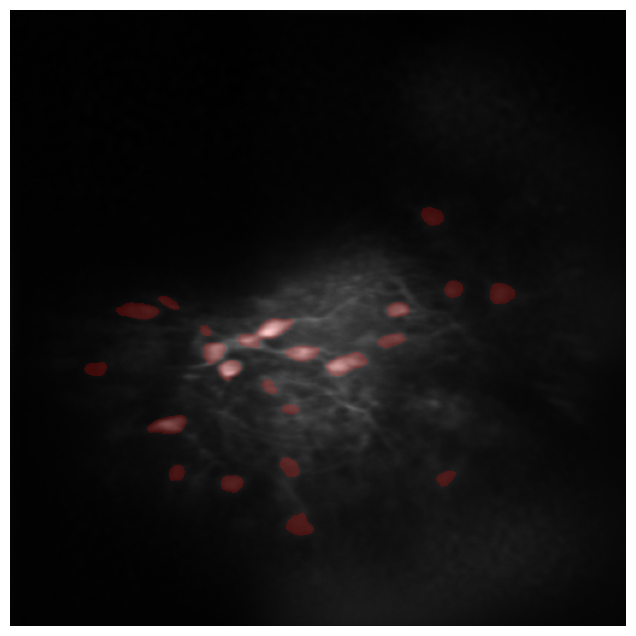

In [49]:
save_mean_with_rois(fasted_folders[0], fill_alpha=0.2)

